<a href="https://colab.research.google.com/github/Georgemoralex/Data-Science-and-AI/blob/main/Reto_4_Visualizaci%C3%B3n_de_datos_en_Pantas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 4 - PLATAFORMAS DE VISUALIZACIÓN**

---

### **SESIÓN: Aplica en el trabajo**

#### LIVE DSA04PR - Plan del Reto
##### Reto | Análisis de deserción de empleados

###### Elaborado por Jorge Morales

1. Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los
análisis solicitados.

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Descarga el archivo: Employees.csv y guarda, en un dataframe (employees), todos sus
registros.

In [71]:
employees = pd.read_csv("/content/Employees.csv")


3. Observa la estructura y contenido del dataframe con los atributos y métodos estudiados
(shape, columns, head(), dtypes, isna())

In [72]:
employees.shape

(7000, 17)

In [73]:
employees.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'Attrition_rate'],
      dtype='object')

In [74]:
employees.head(3)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851


In [75]:
employees.dtypes

,0
Employee_ID,object
Gender,object
Age,float64
Education_Level,int64
Relationship_Status,object
Hometown,object
Unit,object
Decision_skill_possess,object
Time_of_service,float64
Time_since_promotion,int64


In [76]:
employees.isna().sum()

,0
Employee_ID,0
Gender,0
Age,412
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,144
Time_since_promotion,0



4. Calcula el % total de valores faltantes y elimina los registros que contengan NaN

In [77]:
# Calculando el porcentaje de NaN en cada columna
print("a) Porcentaje de NaN en cada columna del dataframe de Employees\n")
percentage_NaN = employees.isna().mean() * 100
percentage_NaN = percentage_NaN.rename('Percentage NaN (%)').round(2)
print(percentage_NaN)
print("\nb) Eliminación de NaN del dataframe de Employees y sumatoria de NaN en cada columna como comprobación")
employees_wo_NaN = employees.dropna()
employees_wo_NaN.isna().sum()

a) Porcentaje de NaN en cada columna del dataframe de Employees

Employee_ID                  0.00
Gender                       0.00
Age                          5.89
Education_Level              0.00
Relationship_Status          0.00
Hometown                     0.00
Unit                         0.00
Decision_skill_possess       0.00
Time_of_service              2.06
Time_since_promotion         0.00
growth_rate                  0.00
Travel_Rate                  0.00
Post_Level                   0.00
Pay_Scale                    0.13
Compensation_and_Benefits    0.00
Work_Life_balance            0.16
Attrition_rate               0.00
Name: Percentage NaN (%), dtype: float64

b) Eliminación de NaN del dataframe de Employees y sumatoria de NaN en cada columna como comprobación


,0
Employee_ID,0
Gender,0
Age,0
Education_Level,0
Relationship_Status,0
Hometown,0
Unit,0
Decision_skill_possess,0
Time_of_service,0
Time_since_promotion,0



5. Obtén la cantidad de valores únicos por columna, para responder:<br>
• ¿Cuántos niveles educativos hay?<br>
• ¿Cuántas ciudades participaron en el estudio?<br>


In [78]:
print("\nNiveles educativos presentes en el dataframe\n")
grouped_by_edlevel = employees_wo_NaN.groupby("Education_Level").size()
print(grouped_by_edlevel)
print("\nCiudades que participaron en el estudio\n")
grouped_by_hometown = employees_wo_NaN.groupby("Hometown").size()
print(grouped_by_hometown)


Niveles educativos presentes en el dataframe

Education_Level
1     634
2     634
3    2654
4    1901
5     610
dtype: int64

Ciudades que participaron en el estudio

Hometown
Clinton         516
Franklin       1390
Lebanon        1908
Springfield    1600
Washington     1019
dtype: int64


6. Realiza el conteo de valores por categoría (value_counts()) para las columnas de género
y estado civil


In [79]:
print("\nCantidad de registros según su género\n")
employees_gender = employees["Gender"].value_counts()
print(employees_gender)
print("\nCantidad de registros según su estado civil\n")
employees_relationship = employees["Relationship_Status"].value_counts()
print(employees_relationship)


Cantidad de registros según su género

Gender
F    4114
M    2886
Name: count, dtype: int64

Cantidad de registros según su estado civil

Relationship_Status
Married    4520
Single     2480
Name: count, dtype: int64


7. A través de la función describe() responde: <br>
a. ¿Cuál es el tiempo máximo de servicio?<br>
b. ¿Qué promedio de edad tienen los empleados encuestados?<br>
c. ¿Cuál es el valor del 1er cuartil en la escala de pago?<br>

In [80]:
stats = employees_wo_NaN.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Age,6433.0,39.577025,13.619576,19.0,27.0000,37.0000,52.0000,65.0000
Education_Level,6433.0,3.189492,1.063881,1.0,3.0000,3.0000,4.0000,5.0000
Time_of_service,6433.0,13.396704,10.379039,0.0,5.0000,10.0000,21.0000,43.0000
Time_since_promotion,6433.0,2.363439,1.149997,0.0,1.0000,2.0000,3.0000,4.0000
growth_rate,6433.0,47.066532,15.743629,20.0,33.0000,47.0000,61.0000,74.0000
Travel_Rate,6433.0,0.816104,0.647836,0.0,0.0000,1.0000,1.0000,2.0000
Post_Level,6433.0,2.791544,1.162849,1.0,2.0000,3.0000,3.0000,5.0000
Pay_Scale,6433.0,6.003731,2.053994,1.0,5.0000,6.0000,8.0000,10.0000
Work_Life_balance,6433.0,2.389709,1.124412,1.0,1.0000,2.0000,3.0000,5.0000
Attrition_rate,6433.0,0.189124,0.185625,0.0,0.0704,0.1426,0.2347,0.9959


In [81]:
print("Del dataframe anterior, podemos contestar a las preguntas de la siguiente manera:\n")

print("El tiempo máximo de servicio es de: ", round(stats.loc["Time_of_service","max"],1))
print("La edad promedio de los encuestados es de: ", round(stats.loc["Age","mean"],1))
print("El valor del primer cuartil en la escala de pago es de: ", round(stats.loc["Pay_Scale","25%"],1))

Del dataframe anterior, podemos contestar a las preguntas de la siguiente manera:

El tiempo máximo de servicio es de:  43.0
La edad promedio de los encuestados es de:  39.6
El valor del primer cuartil en la escala de pago es de:  5.0



8. Elabora un histograma con las edades para identificar el rango más común.


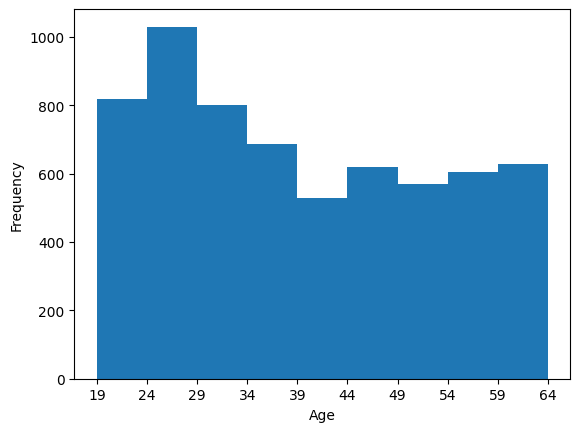

In [82]:
ax = employees_wo_NaN["Age"].plot.hist(bins = range(int(employees_wo_NaN["Age"].min()),int(employees_wo_NaN["Age"].max()),5))
ax.set_xlabel("Age")
ax.set_xticks(range(int(employees_wo_NaN["Age"].min()),int(employees_wo_NaN["Age"].max()),5))
plt.show()

El rango de edad más común es entre 24 y 29 años de edad


9. Construye un gráfico de frecuencias (o conteo) para las unidades funcionales (Unit). ¿En
qué unidad hay mayor número de empleados?


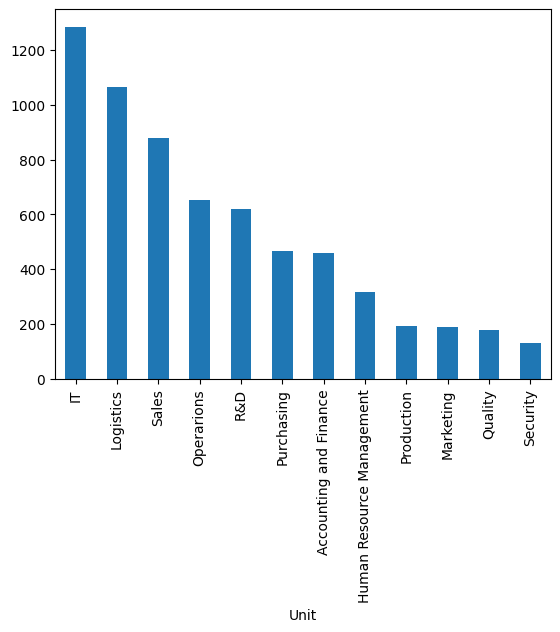

In [83]:
grouped_by_unit = employees_wo_NaN.groupby("Unit").size()
sorted_grouped_by_unit = grouped_by_unit.sort_values(ascending=False)
sorted_grouped_by_unit.plot(kind="bar")
plt.show()

Según el gráfico de frecuencia mostrado arriba, **IT es la unidad con mayor cantidad de empleados**

10. Realiza una agrupación por ciudad, con el promedio de todas las columnas y almacena
el resultado en un nuevo dataframe (employees_by_hometown).


In [84]:
employees_by_hometown = employees_wo_NaN.groupby("Hometown").mean(numeric_only=True).round(2)
employees_by_hometown

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
Hometown,,,,,,,,,,
Clinton,38.97,3.16,12.87,2.29,47.54,0.87,2.79,6.05,2.44,0.19
Franklin,40.03,3.19,13.73,2.37,47.00,0.82,2.77,6.01,2.41,0.19
Lebanon,40.02,3.23,13.83,2.37,46.54,0.80,2.79,5.98,2.37,0.19
Springfield,39.01,3.16,13.00,2.37,47.04,0.82,2.80,6.07,2.40,0.20
Washington,39.32,3.18,13.02,2.38,47.95,0.81,2.80,5.91,2.37,0.19


11. Visualiza el dataframe obtenido en una única gráfica (usando pandas:
employees_by_hometown.plot() ). Como no es legible por la diferencia de escalas en las
columnas, sepáralas en subplots. ¿Qué ciudad tiene el mayor índice de deserción?
Observa el resto de sus variables


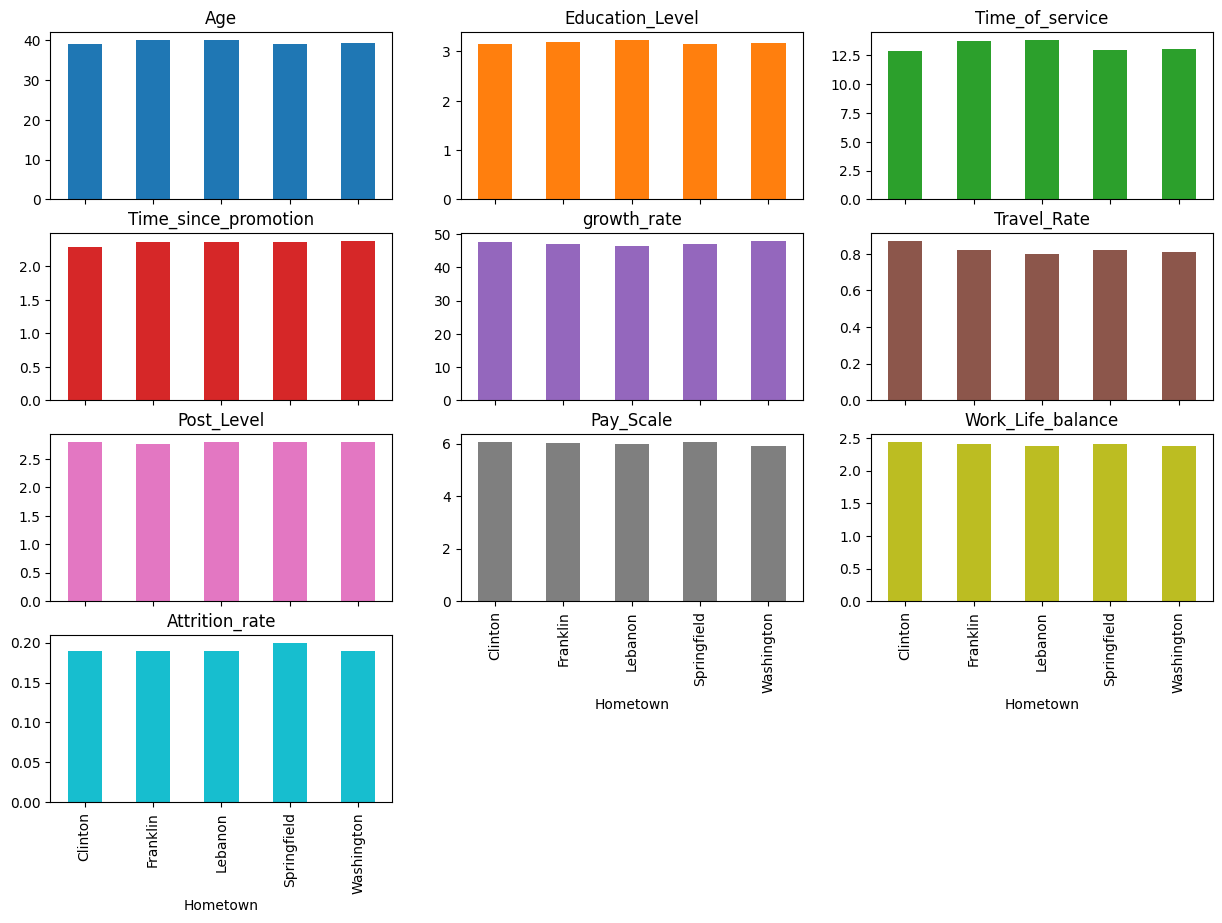

In [85]:
employees_by_hometown.plot(kind='bar', subplots=True, layout=(4, 3), figsize=(15, 10), legend=False)
plt.show()

Según las gráficas mostradas arriba, Springfield es la ciudad con mayor índice de deserción

12. Utiliza el dataframe original (después de eliminar los NaN) para analizar el impacto del
nivel educativo en la escala de pago. Para ello, construye un box plot que considere
estas dos variables.


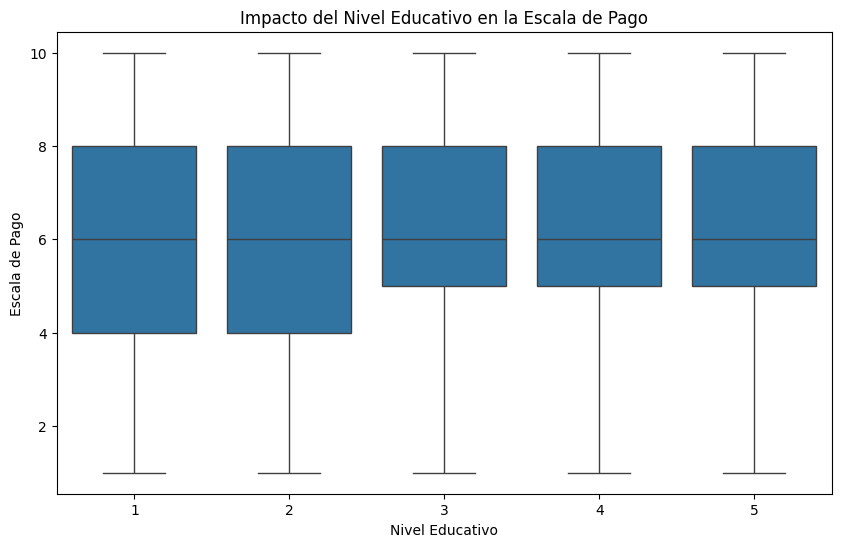

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=employees_wo_NaN['Education_Level'], y=employees_wo_NaN['Pay_Scale'])
plt.title('Impacto del Nivel Educativo en la Escala de Pago')
plt.xlabel('Nivel Educativo')
plt.ylabel('Escala de Pago')
plt.show()

El grafico demuestra que a mayor nivel educativo, mejores las oportunidades de tener un mejor pago.

13. Elabora dos scatter plots para determinar si hay correlación entre:
a. Edad y Tasa de deserción
b. Tiempo de servicio y Tasa de deserción


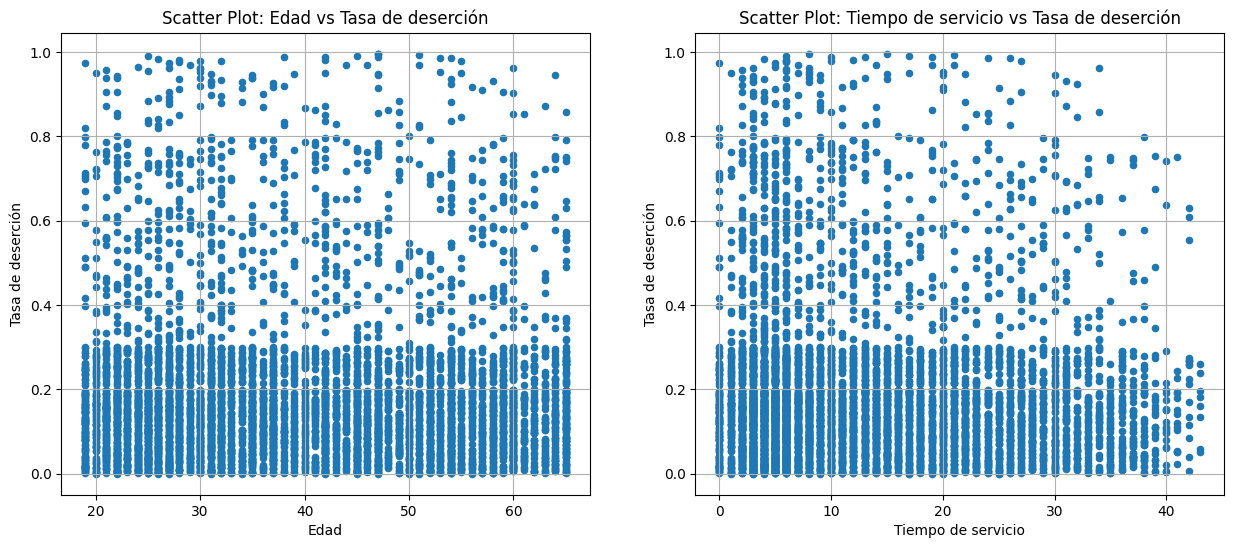

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

employees_wo_NaN.plot.scatter(x='Age', y='Attrition_rate', ax=axs[0])
axs[0].set_title('Scatter Plot: Edad vs Tasa de deserción')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Tasa de deserción')
axs[0].grid(True)

employees_wo_NaN.plot.scatter(x='Time_of_service', y='Attrition_rate', ax=axs[1])
axs[1].set_title('Scatter Plot: Tiempo de servicio vs Tasa de deserción')
axs[1].set_xlabel('Tiempo de servicio')
axs[1].set_ylabel('Tasa de deserción')
axs[1].grid(True)

plt.show()

No hay correlación entre estas variables: Edad y Tasa de deserción, Tiempo de servicio y Tasa de deserción.

14. Crea un heatmap que muestre la correlación entre todos los pares de variables
numéricas. Parece que nos queda mucho por descubrir 


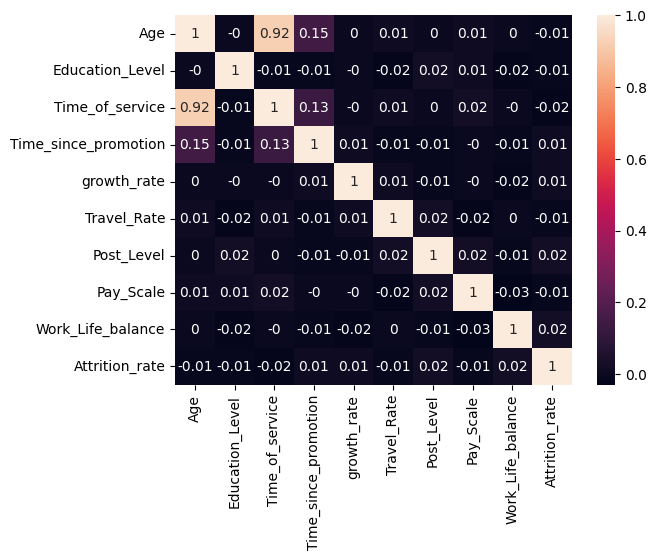

In [88]:
sns.heatmap(round(employees_wo_NaN.corr(numeric_only=True),2), annot=True)
plt.show()

Este gráfico nos muestra que los datos con mayor correlación son el tiempo de servicio y la edad.

15. Al finalizar comparte tu libreta (Google Colab) con el instructor (sigue las
recomendaciones de la sección Formato de entrega de actividad)
